In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [3]:
ODs = {"2008": None,
       "2013": None,
       "2018": None,
       "2023": None}
for year in ODs:
    ODs[year] = pd.read_csv("OD" + year + ".csv")

In [4]:
main_data = pd.concat([ODs["2008"], ODs["2018"], ODs["2013"]], axis=0)
selected_data = main_data[["d_dessm", "d_mode1"]]
selected_data = selected_data.values

In [5]:
pox = ODs["2008"]
print(len(pox[pox["m_domsm"]==pox["d_dessm"]])/len(pox))
print(len(pox[pox["d_orism"]==pox["d_dessm"]])/len(pox))
pox = ODs["2013"]
print(len(pox[pox["m_domsm"]==pox["d_dessm"]])/len(pox))
print(len(pox[pox["d_orism"]==pox["d_dessm"]])/len(pox))
pox = ODs["2018"]
print(len(pox[pox["m_domsm"]==pox["d_dessm"]])/len(pox))
print(len(pox[pox["d_orism"]==pox["d_dessm"]])/len(pox))
pox = ODs["2023"]
print(len(pox[pox["m_domsm"]==pox["d_dessm"]])/len(pox))
print(len(pox[pox["d_orism"]==pox["d_dessm"]])/len(pox))

0.6600842501910738
0.3716357690051723
0.6611286568923238
0.3979654738854506
0.6571472040672722
0.37982338808345006
0.7136905996116945
0.438634521498181


(0.0, 100.0)

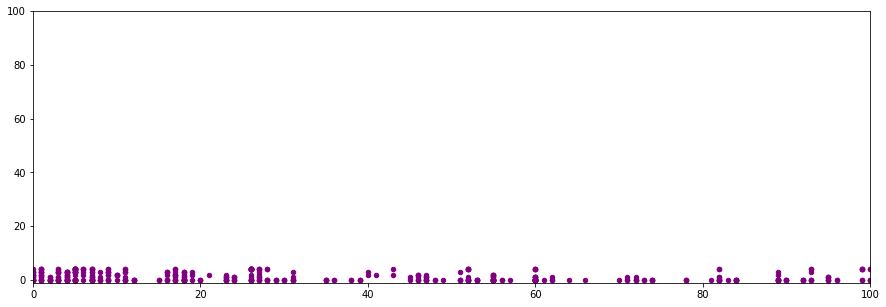

In [6]:
plt.figure(figsize=(15, 5))
plt.scatter(selected_data[:500, 0], selected_data[:500, 1], c="purple", s=20)
plt.ylim([-1, 100])
plt.xlim([0, 100])

In [7]:
scaler = MinMaxScaler()
selected_data_scaled = scaler.fit_transform(selected_data)

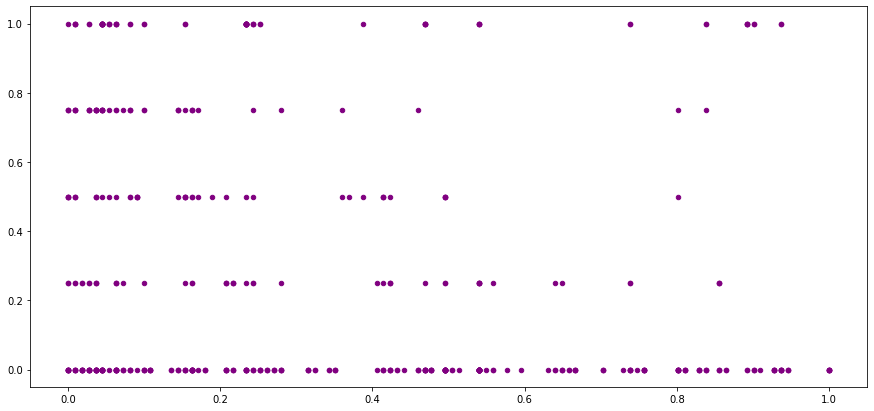

In [8]:
plt.figure(figsize=(15, 7))
plt.scatter(selected_data_scaled[:500, 0], selected_data_scaled[:500, 1], c="purple", s=20)
# plt.ylim([-1, 100])
# plt.xlim([0, 100])

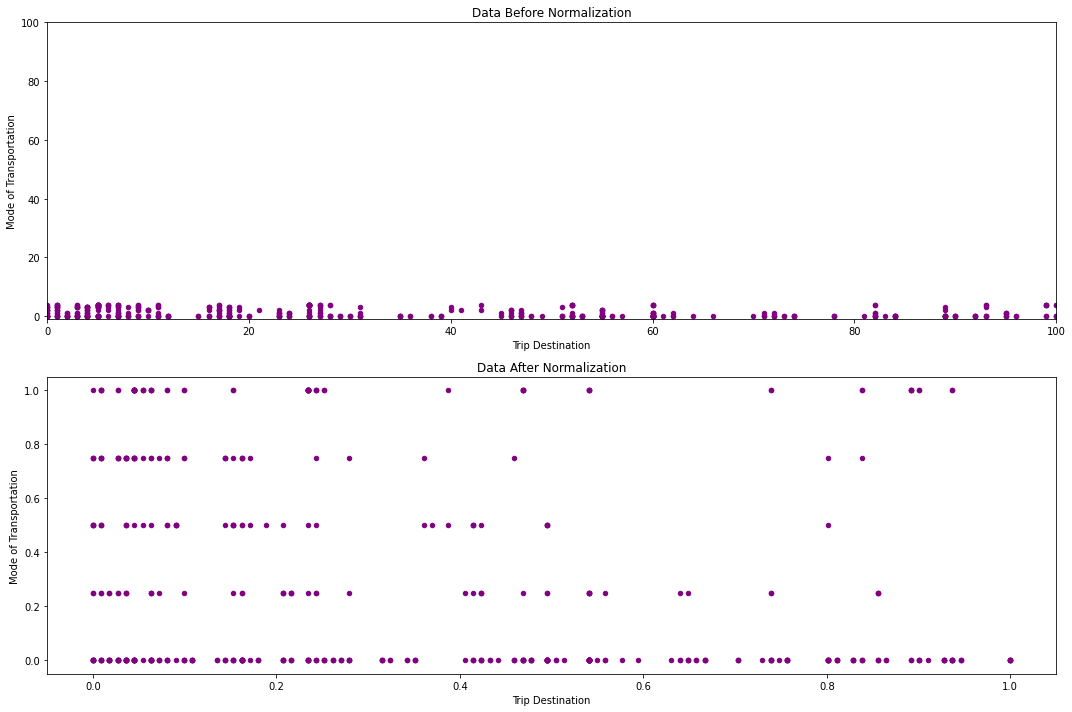

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
plt.subplots_adjust(left=None, bottom=10, right=None, top=11, wspace=None, hspace=None)


ax[0].scatter(selected_data[:500, 0], selected_data[:500, 1], c="purple", s=20)
ax[0].set_ylim([-1, 100])
ax[0].set_title("Data Before Normalization")
ax[0].set_xlabel("Trip Destination")
ax[0].set_ylabel("Mode of Transportation")
ax[0].set_xlim([0, 100])

ax[1].scatter(selected_data_scaled[:500, 0], selected_data_scaled[:500, 1], c="purple", s=20)
ax[1].set_title("Data After Normalization")
ax[1].set_xlabel("Trip Destination")
ax[1].set_ylabel("Mode of Transportation")
fig.tight_layout()
fig.savefig("Normalization.jpeg", dpi=200)
# plt.show()

In [22]:
pca = PCA(n_components=2)
pox = pca.fit_transform(main_data.values)

In [11]:
# pox = np.c_[pox, main_data['d_mode1'].values]

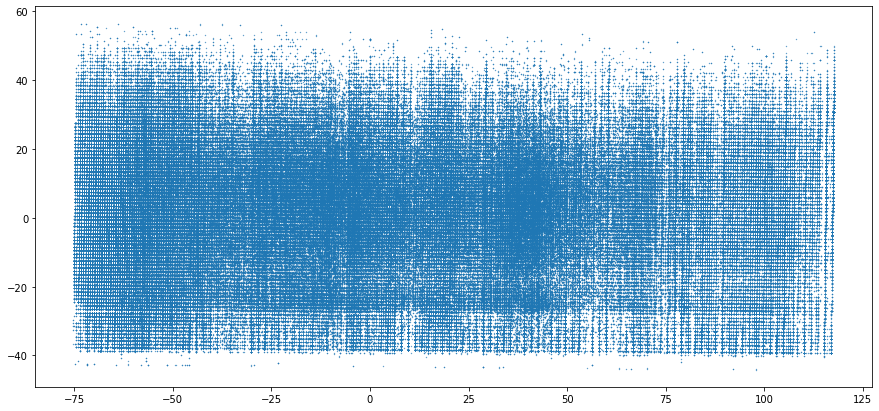

In [23]:
plt.figure(figsize=(15, 7))
plt.scatter(pox[:, 0], pox[:, 1], s=0.1)

In [72]:

A_candids = pox[np.argwhere((pox[:, 0]<-50)
                            & (pox[:, 1]<-25))].squeeze()
A = A_candids[np.random.choice(len(A_candids), 100)]

B_candids = pox[np.argwhere((pox[:, 0]<25) & (0<pox[:, 0]) & (pox[:, 1]<20) & (0<pox[:, 1]))].squeeze()
B = B_candids[np.random.choice(len(B_candids), 100)]

C_candids = pox[np.argwhere((pox[:, 0]<-50) & (-70<pox[:, 0]) & (pox[:, 1]<22) & (5<pox[:, 1]))].squeeze()
C = C_candids[np.random.choice(len(C_candids), 100)]

(-40.0, 30.0)

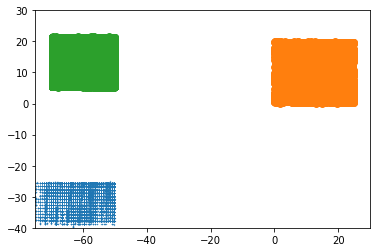

In [73]:
plt.scatter(A_candids[:, 0], A_candids[:, 1], s=0.1)
plt.scatter(B_candids[:, 0], B_candids[:, 1])
plt.scatter(C_candids[:, 0], C_candids[:, 1])


plt.xlim([-75, 30])
plt.ylim([-40, 30])

In [28]:
B.shape

(100, 2)

29.132608333205912
10.829309343317066
31.08026398133119
-23.652951731578106
-16.737263281914178
28.975819363470574
30.530328010696156
-20.300614630098334
36.66354978449933


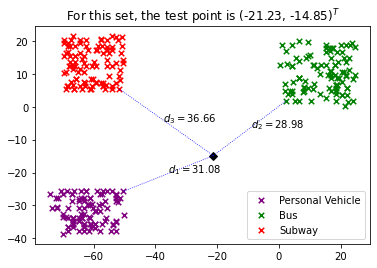

In [97]:
import numpy as np
import matplotlib.pyplot as plt

def distance(a, b):
    w_diff = a[0] - b[0]
    h_diff = a[1] - b[1]
    
    d = np.sqrt(w_diff**2 + h_diff**2)
    print(w_diff)
    print(h_diff)
    print(d)
    return "{:.2f}".format(d)

def find_closest_point_idx(point, data):
    distances = np.linalg.norm(data - point, axis=1)
    return list(distances).index(min(distances))

# A = 7 + 0.5 * np.random.randn(35, 2)
mu_a = np.mean(A, axis=0)
# B =  0.5 * np.random.randn(35, 2)
mu_b = np.mean(B, axis=0)
# C = np.array([[0, 7]]) + 0.5 * np.random.randn(35, 2)
mu_c = np.mean(C, axis=0)


test_point = np.array([-21.23, -14.85])
closest_A = A[find_closest_point_idx(test_point, A)]
closest_B = B[find_closest_point_idx(test_point, B)]
closest_C = C[find_closest_point_idx(test_point, C)]

      
plt.scatter(A[:, 0], A[:, 1], c="purple", s=30, marker="x", label="Personal Vehicle")
plt.scatter(B[:, 0], B[:, 1], c="green", s=30, marker="x", label="Bus")
plt.scatter(C[:, 0], C[:, 1], c="red", s=30, marker="x", label="Subway")
plt.plot(test_point[0], test_point[1], c="black", marker="D", markersize=5)
plt.legend()
#plt.plot(closest_A[0], closest_A[1], c="purple", marker="o", markersize=5)
#plt.plot(closest_B[0], closest_B[1], c="green", marker="o", markersize=5)
#plt.plot(closest_C[0], closest_C[1], c="red", marker="o", markersize=5)
plt.plot([test_point[0], closest_A[0]], [test_point[1], closest_A[1]], linestyle="dotted", linewidth=0.8, c="blue")
plt.plot([test_point[0], closest_B[0]], [test_point[1], closest_B[1]], linestyle="dotted", linewidth=0.8, c="blue")
plt.plot([test_point[0], closest_C[0]], [test_point[1], closest_C[1]], linestyle="dotted", linewidth=0.8, c="blue")
mid_A = (closest_A + test_point) / 2
mid_B = (closest_B + test_point) / 2
mid_C = (closest_C + test_point) / 2
plt.text(mid_A[0], mid_A[1]+0.2, r'$d_1=$'+distance(test_point, closest_A))
plt.text(mid_B[0]+0.2, mid_B[1]+0.2, r'$d_2=$'+distance(test_point, closest_B))
plt.text(mid_C[0]-1, mid_C[1]+0.2, r'$d_3=$'+distance(test_point, closest_C))
test_point_str = "(" + "{:.2f}".format(test_point[0]) + ", " + "{:.2f}".format(test_point[1]) + ")$^T$"
plt.title("For this set, the test point is " + test_point_str)

plt.savefig("knn.jpeg", bbox_inches='tight', dpi=200)
plt.show()


3

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats 

def classify(point, mean1, mean2, mean3, std1, std2, std3):
    mean11, mean12 = mean1
    mean21, mean22 = mean2
    mean31, mean32 = mean3
    std11, std12 = std1
    std21, std22 = std2
    std31, std32 = std3
    x,y  = point
    probA = scipy.stats.norm(mean11, std11).pdf(x) * scipy.stats.norm(mean12, std12).pdf(y)
    probB = scipy.stats.norm(mean21, std21).pdf(x) * scipy.stats.norm(mean22, std22).pdf(y)
    probC = scipy.stats.norm(mean31, std31).pdf(x) * scipy.stats.norm(mean32, std32).pdf(y)

    #print(probA)
    max_prob = np.max([probA, probB, probC])
#     print("probA is " + str(mean11))
#     print(probB)
#     print(probC)
#     print()
    if probA == max_prob:
        return "purple"
    if probB == max_prob:
        return "green"
    if probC == max_prob:
        return "red"
    #print(probA)
    #print(probB)
mu1, sigma1 = np.mean(A, axis=0), np.std(A, axis=0)
mu2, sigma2 = np.mean(B, axis=0), np.std(B, axis=0)
mu3, sigma3 = np.mean(C, axis=0), np.std(C, axis=0)
# mu1, sigma1 = np.array([7, 7]).T, 0.3
# mu2, sigma2 = np.array([1, 1]).T, 0.65
# A = mu1 + sigma1 * np.random.randn(100, 2)
# B = mu2 + sigma2 * np.random.randn(100, 2)
z = np.linspace(-100, 40, 260)
xv, yv = np.meshgrid(z, z)
colors = []
for i, (x, y) in enumerate(zip(xv.flatten(), yv.flatten())):
    #print(x, end="\t")
    #print(y)
    if i%200 == 0:
        print(i/(260*260)*100)
    colors.append(classify(point=np.array([x, y]),
                           mean1=mu1, mean2=mu2, mean3=mu3,
                           std1=sigma1, std2=sigma2, std3=sigma3))


# plt.scatter(A[:, 0], A[:, 1])
# plt.scatter(B[:, 0], B[:, 1])
# plt.scatter(B[:, 0], B[:, 1])

# plt.xlim([-3, 10])
# plt.ylim([-3, 10])
# plt.show()


0.0
0.2958579881656805
0.591715976331361
0.8875739644970414
1.183431952662722
1.4792899408284024
1.7751479289940828
2.0710059171597637
2.366863905325444
2.6627218934911245
2.9585798816568047
3.2544378698224854
3.5502958579881656
3.8461538461538463
4.142011834319527
4.437869822485207
4.733727810650888
5.029585798816568
5.325443786982249
5.621301775147929
5.9171597633136095
6.21301775147929
6.508875739644971
6.804733727810651
7.100591715976331
7.396449704142012
7.6923076923076925
7.988165680473373
8.284023668639055
8.579881656804734
8.875739644970414
9.171597633136095
9.467455621301776
9.763313609467456
10.059171597633137
10.355029585798817
10.650887573964498
10.946745562130179
11.242603550295858
11.538461538461538
11.834319526627219
12.1301775147929
12.42603550295858
12.721893491124261
13.017751479289942
13.313609467455622
13.609467455621301
13.905325443786982
14.201183431952662
14.497041420118343
14.792899408284024
15.088757396449704
15.384615384615385
15.680473372781064
15.97633136094

c:\program files\python\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


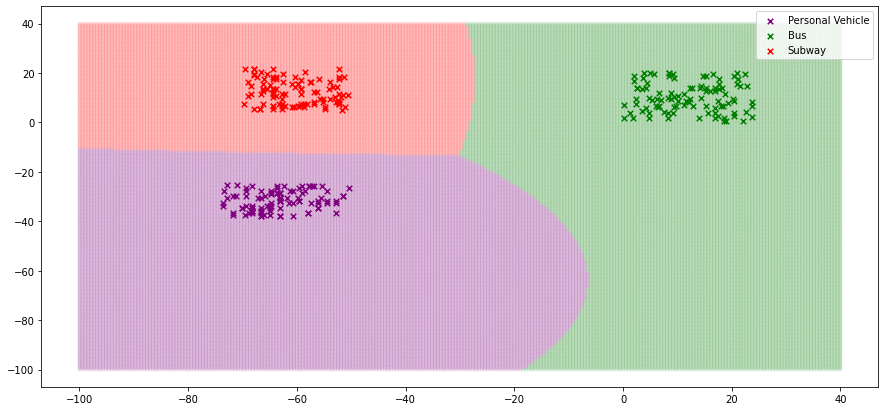

In [68]:
plt.figure(figsize=(15, 7))

plt.scatter(A[:, 0], A[:, 1], c="purple", s=30, marker="x", label="Personal Vehicle")
plt.scatter(B[:, 0], B[:, 1], c="green", s=30, marker="x", label="Bus")
plt.scatter(C[:, 0], C[:, 1], c="red", s=30, marker="x", label="Subway")

plt.scatter(xv, yv, c=colors, s=10, alpha=0.08)
plt.legend()
# plt.xlim([-3, 10])
# plt.ylim([-3, 10])
# plt.text(2, 3, "POX")
plt.savefig("gaussian_data.png", dpi=200)
plt.show()

In [70]:
from sklearn.svm import SVC

In [83]:
# mu1, sigma1 = np.array([6, 6]).T, 1
# mu2, sigma2 = np.array([1, 1]).T, 1
# A = mu1 + sigma1 * np.random.randn(50, 2)
# B = mu2 + sigma2 * np.random.randn(50, 2)

X = np.r_[A, B, C]
y=np.r_[np.ones((100, 1)), 2*np.ones((100, 1)), 3*np.ones((100, 1))]

shuffler = np.random.permutation(len(X))
X_shuffled = X[shuffler]
y_shuffled = y[shuffler]

In [87]:
clf1 = SVC(kernel="poly", degree=3)
clf1.fit(X_shuffled, y_shuffled.ravel())

clf2 = SVC(kernel="rbf")
clf2.fit(X_shuffled, y_shuffled.ravel())

clf3 = SVC(kernel="linear")
clf3.fit(X_shuffled, y_shuffled.ravel())


z = np.linspace(-100, 40, 260)

In [89]:
xv, yv = np.meshgrid(z, z)
colors1 = []
colors2 = []
colors3 = []

In [90]:
for i, (x, y) in enumerate(zip(xv.flatten(), yv.flatten())):
    #print(x, end="\t")
    #print(y)
    if i%100 == 0:
        print(i/(100*100)*100)
    test_point = np.array([x, y]).reshape(1, -1)
    y1 = clf1.predict(test_point)
    y2 = clf2.predict(test_point)
    y3 = clf3.predict(test_point)

    if y1 == 1:
        colors1.append("purple")
    elif y1==2:
        colors1.append("green")
    elif y1==3:
        colors1.append("red")
        
    if y2 == 1:
        colors2.append("purple")
    elif y2==2:
        colors2.append("green")
    elif y2==3:
        colors2.append("red")
        
    if y3 == 1:
        colors3.append("purple")
    elif y3==2:
        colors3.append("green")
    elif y3==3:
        colors3.append("red")
#     if y2 == 1:
#         colors2.append("red")
#     else:
#         colors2.append("blue")
#     if y3 == 1:
#         colors3.append("red")
#     else:
#         colors3.append("blue")
#     colors.append(classify(point=np.array([x, y]),
#                            mean1=mu1, mean2=mu2,
#                            std1=sigma1, std2=sigma2))

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.000000000000001
8.0
9.0
10.0
11.0
12.0
13.0
14.000000000000002
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.000000000000004
28.999999999999996
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.00000000000001
56.00000000000001
56.99999999999999
57.99999999999999
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0
100.0
101.0
102.0
103.0
104.0
105.0
106.0
107.0
108.0
109.00000000000001
110.00000000000001
111.00000000000001
112.00000000000001
112.99999999999999
113.99999999999999
114.99999999999999
115.99999999999999
117.0
118.0
119.0
120.0
121.0
122.0
123.0
124.0
125.0
126.0
127.0
128.0
129.0
130.0
131.0
132.0
133.0
134.0
135.0
136.0
137.0
138.0
139.0
140.0
141.0
142.0
143.0
144.0
145.0
146.0
147.0
148.0
149.

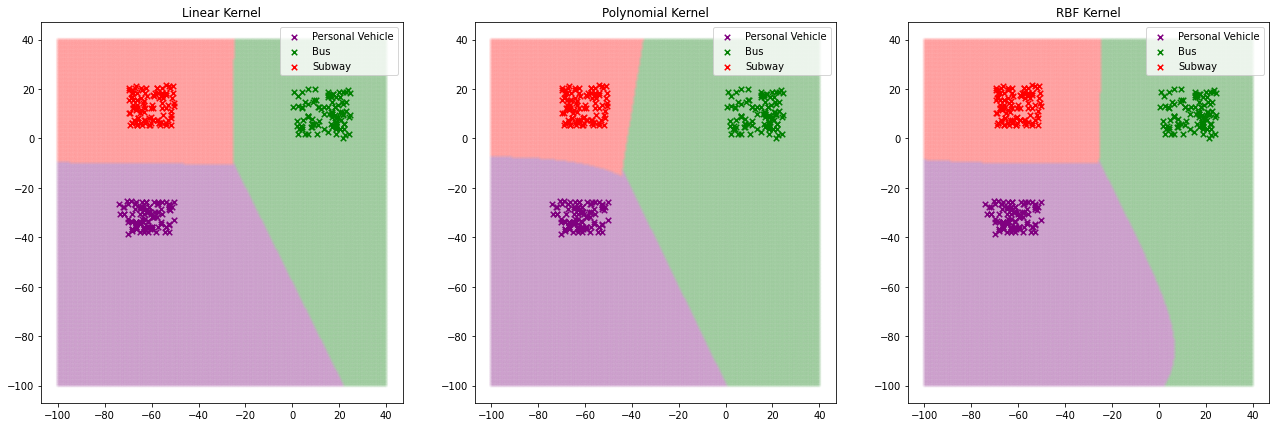

In [100]:
fig, ax = plt.subplots(1, 3, figsize=(22, 7))
ax[0].scatter(A[:, 0], A[:, 1], c="purple", s=30, marker="x", label="Personal Vehicle")
ax[0].scatter(B[:, 0], B[:, 1], c="green", s=30, marker="x", label="Bus")
ax[0].scatter(C[:, 0], C[:, 1], c="red", s=30, marker="x", label="Subway")
ax[0].scatter(xv, yv, c=colors3, s=10, alpha=0.04)
# ax[0].set_xlim([-2, 9])
# ax[0].set_ylim([-2, 9])
ax[0].set_title("Linear Kernel")
ax[0].legend()

ax[1].scatter(A[:, 0], A[:, 1], c="purple", s=30, marker="x", label="Personal Vehicle")
ax[1].scatter(B[:, 0], B[:, 1], c="green", s=30, marker="x", label="Bus")
ax[1].scatter(C[:, 0], C[:, 1], c="red", s=30, marker="x", label="Subway")
ax[1].scatter(xv, yv, c=colors1, s=10, alpha=0.04)
# ax[1].set_xlim([-2, 9])
# ax[1].set_ylim([-2, 9])
ax[1].set_title("Polynomial Kernel")
ax[1].legend()

ax[2].scatter(A[:, 0], A[:, 1], c="purple", s=30, marker="x", label="Personal Vehicle")
ax[2].scatter(B[:, 0], B[:, 1], c="green", s=30, marker="x", label="Bus")
ax[2].scatter(C[:, 0], C[:, 1], c="red", s=30, marker="x", label="Subway")
ax[2].scatter(xv, yv, c=colors2, s=10, alpha=0.04)
# ax[2].set_xlim([-2, 9])
# ax[2].set_ylim([-2, 9])
ax[2].set_title("RBF Kernel")
ax[2].legend()

# plt.text(2, 3, "POX")
fig.savefig("SVMs.png", dpi=200)
# plt.show()
# plt.text(2, 3, "POX")

40.852446091865616
16.788166084846594
44.16746395460328
-35.384364187754144
-24.92855457343562
43.28378520984938
39.72676384479516
-27.818564809045014
48.498333101408356


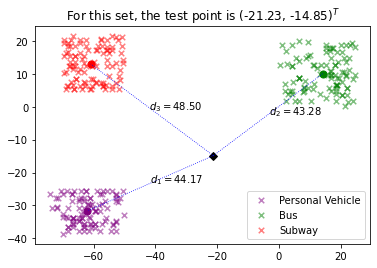

In [109]:
import numpy as np
import matplotlib.pyplot as plt

def distance(a, b):
    w_diff = a[0] - b[0]
    h_diff = a[1] - b[1]
    
    d = np.sqrt(w_diff**2 + h_diff**2)
    print(w_diff)
    print(h_diff)
    print(d)
    return "{:.2f}".format(d)

def find_closest_point_idx(point, data):
    distances = np.linalg.norm(data - point, axis=1)
    return list(distances).index(min(distances))

# A = 7 + 0.5 * np.random.randn(35, 2)
mu_a = np.mean(A, axis=0)
# B =  0.5 * np.random.randn(35, 2)
mu_b = np.mean(B, axis=0)
# C = np.array([[0, 7]]) + 0.5 * np.random.randn(35, 2)
mu_c = np.mean(C, axis=0)


test_point = np.array([-21.23, -14.85])
closest_A = mu_a
closest_B = mu_b
closest_C = mu_c

      
plt.scatter(A[:, 0], A[:, 1], c="purple", s=30, marker="x", label="Personal Vehicle", alpha=0.5)
plt.scatter(mu_a[0], mu_a[1], c="purple", s=50, marker="o")
plt.scatter(B[:, 0], B[:, 1], c="green", s=30, marker="x", label="Bus", alpha=0.5)
plt.scatter(mu_b[0], mu_b[1], c="green", s=50, marker="o")
plt.scatter(C[:, 0], C[:, 1], c="red", s=30, marker="x", label="Subway", alpha=0.5)
plt.scatter(mu_c[0], mu_c[1], c="red", s=50, marker="o")
plt.plot(test_point[0], test_point[1], c="black", marker="D", markersize=5)
plt.legend()
#plt.plot(closest_A[0], closest_A[1], c="purple", marker="o", markersize=5)
#plt.plot(closest_B[0], closest_B[1], c="green", marker="o", markersize=5)
#plt.plot(closest_C[0], closest_C[1], c="red", marker="o", markersize=5)
plt.plot([test_point[0], closest_A[0]], [test_point[1], closest_A[1]], linestyle="dotted", linewidth=0.8, c="blue")
plt.plot([test_point[0], closest_B[0]], [test_point[1], closest_B[1]], linestyle="dotted", linewidth=0.8, c="blue")
plt.plot([test_point[0], closest_C[0]], [test_point[1], closest_C[1]], linestyle="dotted", linewidth=0.8, c="blue")
mid_A = (closest_A + test_point) / 2
mid_B = (closest_B + test_point) / 2
mid_C = (closest_C + test_point) / 2
plt.text(mid_A[0], mid_A[1]+0.2, r'$d_1=$'+distance(test_point, closest_A))
plt.text(mid_B[0]+0.2, mid_B[1]+0.2, r'$d_2=$'+distance(test_point, closest_B))
plt.text(mid_C[0]-1, mid_C[1]+0.2, r'$d_3=$'+distance(test_point, closest_C))
test_point_str = "(" + "{:.2f}".format(test_point[0]) + ", " + "{:.2f}".format(test_point[1]) + ")$^T$"
plt.title("For this set, the test point is " + test_point_str)

plt.savefig("nearest_cent.jpeg", bbox_inches='tight', dpi=200)
plt.show()
